In [1]:
#import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
#read the csv file
df=pd.read_csv("winequality-red.csv")

In [3]:
#displaying the first 5 rows of the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#finding the shape of the dataframe
df.shape

(1599, 12)

In [5]:
#checking if there are any null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#displays the mean,mode,count,etc
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B355D5F198>,
      dtype=object)

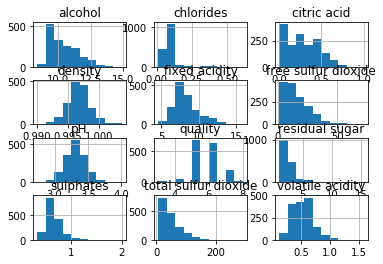

In [7]:
#analysing the data via histograms
df.hist()

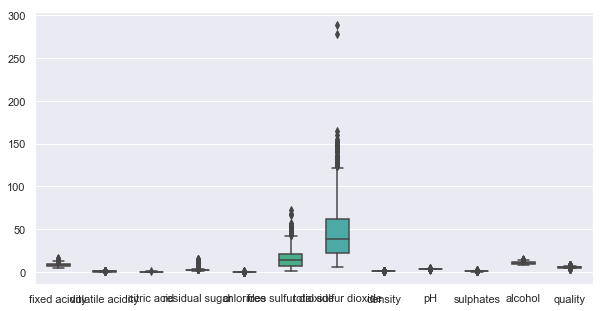

In [10]:
#analysing the data via boxplots
sns.boxplot(data=df,width=0.5,fliersize=5)
sns.set(rc={'figure.figsize':(10,5)})

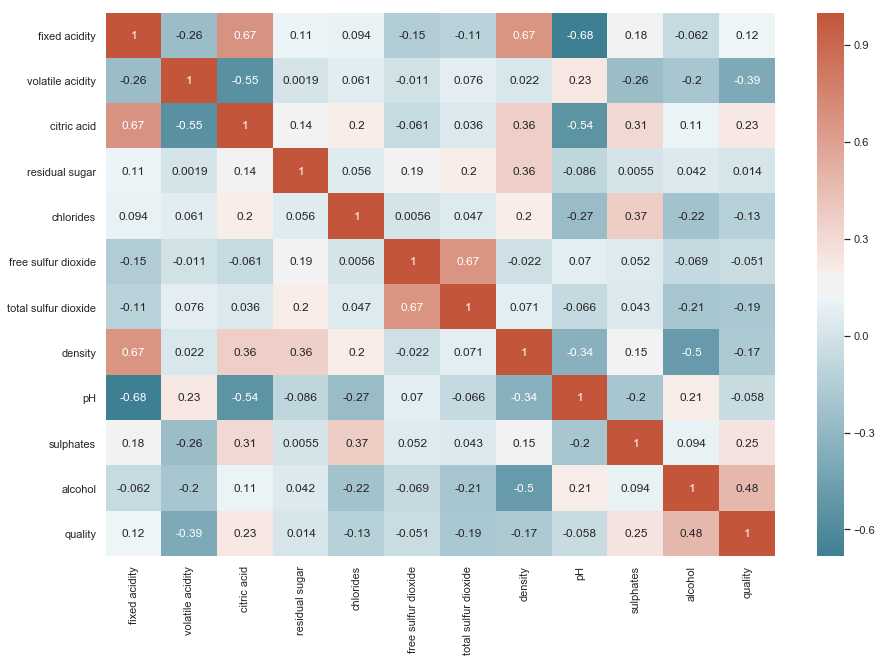

In [12]:
#checking correlation between quality and other features
#if positive then directly proportional else inversely proportional
corr=df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr,xticklabels=df.columns,yticklabels=df.columns,annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

From the heat map above we can notice that fixed acidity,citric acid,sulphates,alcohol and residual sugars are directly proportional to the quality of the wine.
Out of all these features alcohol influences quality more.
On the other hand-volatile acidity,chlorides,free sulfur dioxide,density,ph, total sulfur dioxide are inversely proportional to the quality of the wine.

C:\Users\Deepthi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


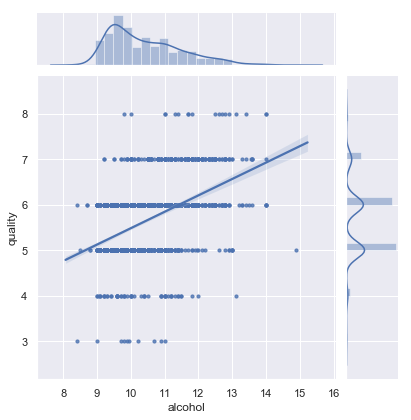

In [15]:
#AlcoholVsQuality
alqual=df[['alcohol','quality']]
jg = sns.JointGrid(x="alcohol", y="quality", data=alqual, size=6)
jg = jg.plot_joint(sns.regplot, scatter_kws={"s": 10})
jg = jg.plot_marginals(sns.distplot)

C:\Users\Deepthi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


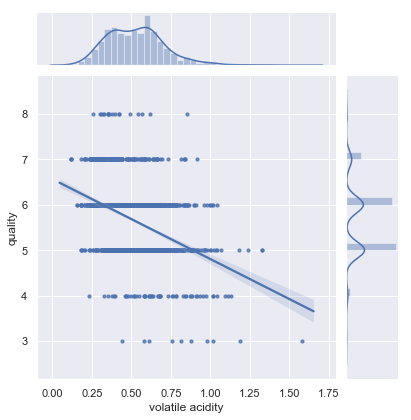

In [20]:
# VolatileAcidityVsQuality
phqual=df[['volatile acidity','quality']]
jg=sns.JointGrid(x="volatile acidity",y="quality",data=phqual,size=6)
jg=jg.plot_joint(sns.regplot,scatter_kws={"s":10})
jg=jg.plot_marginals(sns.distplot)

If the quality of the wine is 7 or higher then it is classified as good/1 or not good/0.

In [21]:
#classifying the quality of wine as 1 or 0
df['quality']=[1 if i>=7 else 0 for i in df['quality']]

In [22]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,0


In [26]:
X=df.iloc[:,0:11]
Y=df['quality']

In [33]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [34]:
#Splitting the data into train and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [35]:
#Applying Decision Tree Algorithm
clf=DecisionTreeClassifier()
clf.fit(X_train,Y_train)
pred=clf.predict(X_test)

In [36]:
#accuracy
clf.score(X_test,Y_test)

0.885